In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv',sep=',')

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
alivedf = df[df['Survived'] == 1]
deaddf  = df[df['Survived'] == 0]

In [12]:
fem_s = alivedf[alivedf['Sex'] == 'female']
fem_d = deaddf[deaddf['Sex'] == 'female']
mal_s = alivedf[alivedf['Sex'] == 'male']
mal_d = deaddf[deaddf['Sex'] == 'male']

In [16]:
print "Female S: " + str(len(fem_s.index))
print "Female D: " + str(len(fem_d.index))
print "Male S: " + str(len(mal_s.index))
print "Male D: " + str(len(mal_d.index))

Female S: 233
Female D: 81
Male S: 109
Male D: 468


In [42]:
def getAges(alivedf):
    s_ages = {
        '0-9':   len(alivedf[(alivedf['Pclass'] == 1) &(alivedf['Age'] >= 0) & (alivedf['Age'] < 9)].index),
        '9-16':  len(alivedf[(alivedf['Pclass'] == 1) &(alivedf['Age'] >= 9) & (alivedf['Age'] < 16)].index),
        '16-25': len(alivedf[(alivedf['Pclass'] == 1) &(alivedf['Age'] >= 16) & (alivedf['Age'] < 25)].index),
        '25-35': len(alivedf[(alivedf['Pclass'] == 1) &(alivedf['Age'] >= 25) & (alivedf['Age'] < 35)].index),
        '35-50': len(alivedf[(alivedf['Pclass'] == 1) &(alivedf['Age'] >= 35) & (alivedf['Age'] < 50)].index),
        '50-60': len(alivedf[(alivedf['Pclass'] == 1) &(alivedf['Age'] >= 50) & (alivedf['Age'] < 60)].index),
        '60-100':len(alivedf[(alivedf['Pclass'] == 1) &(alivedf['Age'] >= 60)].index),
    }
    return s_ages

s_ages = getAges(alivedf)
print s_ages
d_ages = getAges(deaddf)
print d_ages


{'60-100': 5, '16-25': 26, '0-9': 2, '25-35': 24, '50-60': 15, '9-16': 3, '35-50': 47}
{'60-100': 12, '16-25': 7, '0-9': 1, '25-35': 10, '50-60': 12, '9-16': 0, '35-50': 22}


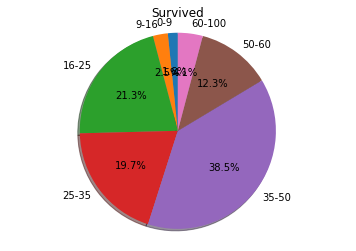

In [43]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '0-9', '9-16', '16-25', '25-35', '35-50', '50-60', '60-100'
sizes = [s_ages[labels[0]], s_ages[labels[1]], s_ages[labels[2]], s_ages[labels[3]], s_ages[labels[4]], s_ages[labels[5]], s_ages[labels[6]]]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survived')
plt.show()

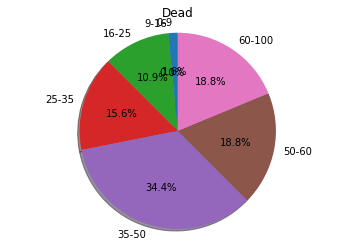

In [44]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '0-9', '9-16', '16-25', '25-35', '35-50', '50-60', '60-100'
sizes = [d_ages[labels[0]], d_ages[labels[1]], d_ages[labels[2]], d_ages[labels[3]], d_ages[labels[4]], d_ages[labels[5]], d_ages[labels[6]]]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Dead')
plt.show()